In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap 

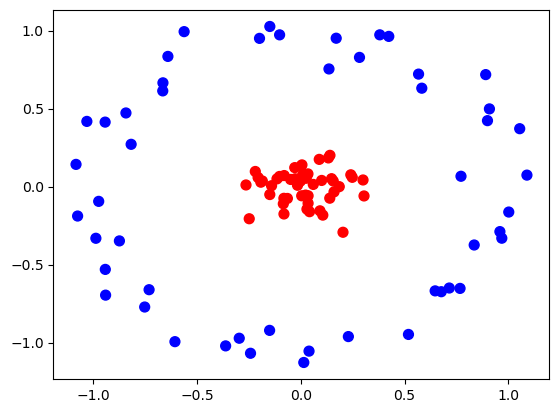

In [4]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [6]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6

In [16]:
cmap1 = ['#0000FF', '#FF0000']
zero_one_colourmap = ListedColormap(cmap1)
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\n\AppData\Local\Temp\ipykernel_14092\3306435683.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


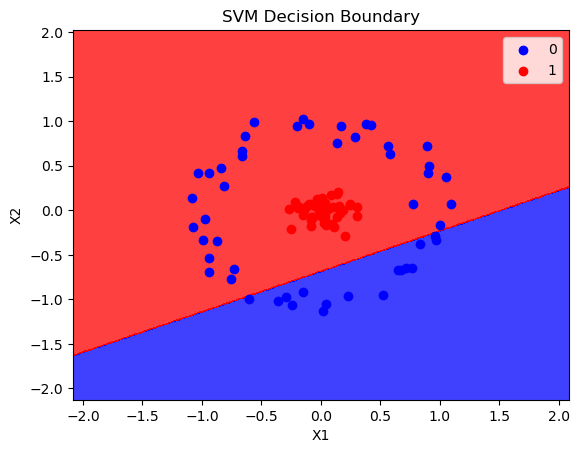

In [17]:
plot_decision_boundary(X, y, classifier)

In [18]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

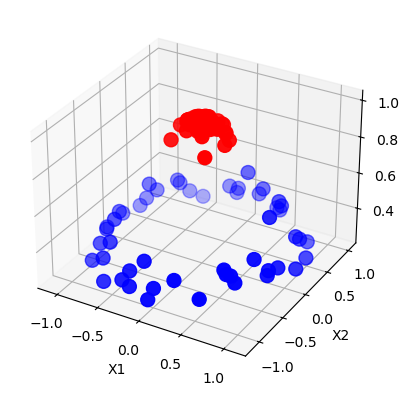

In [19]:
plot_3d_plot(X,y)

In [20]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\n\AppData\Local\Temp\ipykernel_14092\3306435683.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


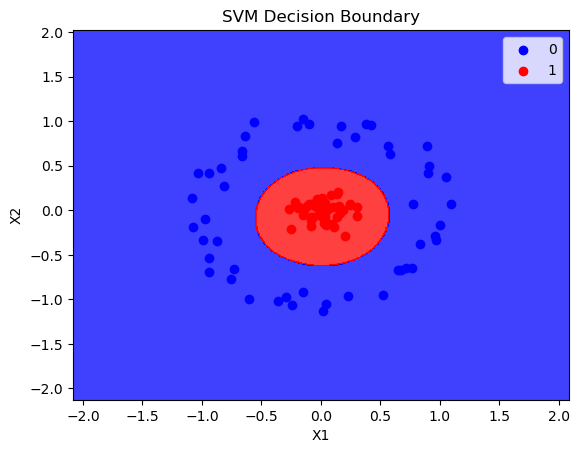

In [22]:
plot_decision_boundary(X, y, rbf_classifier)

In [23]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)


1.0

C:\Users\n\AppData\Local\Temp\ipykernel_14092\3306435683.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


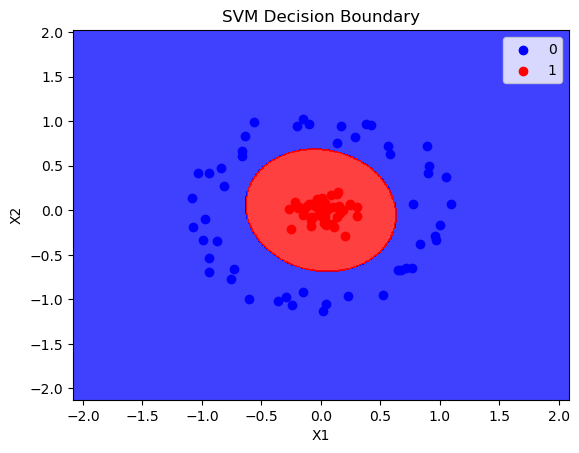

In [25]:
plot_decision_boundary(X, y, poly_classifier)


In [26]:
X

array([[-6.07038608e-01, -9.93770262e-01],
       [ 1.05932453e-01, -1.82772737e-01],
       [ 3.80653178e-01,  9.72563105e-01],
       [ 6.47592700e-01, -6.68300927e-01],
       [-1.49496408e-01,  1.02607874e+00],
       [-8.16977963e-02, -7.51078712e-02],
       [-6.65792902e-01,  6.13275934e-01],
       [-1.02391812e-01,  9.72432476e-01],
       [-2.96998263e-01, -9.71816014e-01],
       [ 9.09315934e-01,  4.97944078e-01],
       [ 3.04603857e-01, -6.00064067e-02],
       [ 1.00253956e+00, -1.63090127e-01],
       [-2.42621312e-01, -1.06817165e+00],
       [ 5.18913127e-01, -9.47454788e-01],
       [ 7.72174174e-01,  6.61816659e-02],
       [ 1.70484628e-01,  9.50854971e-01],
       [ 2.29122188e-01, -9.61128945e-01],
       [-9.43614218e-01,  4.13183695e-01],
       [-9.42786214e-01, -5.30658375e-01],
       [ 2.99833280e-01,  4.24114271e-02],
       [-2.64481407e-01,  1.04145651e-02],
       [-1.60558995e-02,  8.57522149e-03],
       [-2.73160823e-02,  4.99610353e-02],
       [-8.

In [27]:
np.exp(-(X**2)).sum(1)


array([1.06425131, 1.95598698, 1.25344961, 1.2972398 , 1.3268449 ,
       1.98772238, 1.32845594, 1.37800744, 1.30447304, 1.2178229 ,
       1.90779649, 1.33976555, 1.26233629, 1.17145417, 1.54650148,
       1.37624926, 1.3458771 , 1.25354528, 1.16570672, 1.91222547,
       1.9323316 , 1.99966871, 1.99676112, 1.29147493, 1.98742886,
       1.95505023, 1.995148  , 1.97846587, 1.98347314, 1.93790421,
       1.96218199, 1.99435761, 1.1847754 , 1.11858685, 1.99538443,
       1.97573588, 1.96771246, 1.9626957 , 1.98842832, 1.40544394,
       1.36670672, 1.98858126, 1.27900962, 1.8774587 , 1.26739224,
       1.97526349, 1.96480891, 1.93688168, 1.99005368, 1.99621773,
       1.99548848, 1.16167191, 1.28534524, 1.97357926, 1.98527736,
       1.97462905, 1.98081651, 1.28743031, 1.23170858, 1.22951318,
       1.96304929, 1.38360521, 1.28875746, 1.04930863, 1.99652267,
       1.23137797, 1.2805046 , 1.29935231, 1.54822936, 1.98449058,
       1.99650119, 1.1997718 , 1.97271519, 1.31933885, 1.99221

In [28]:
X_new=np.exp(-(X**2))


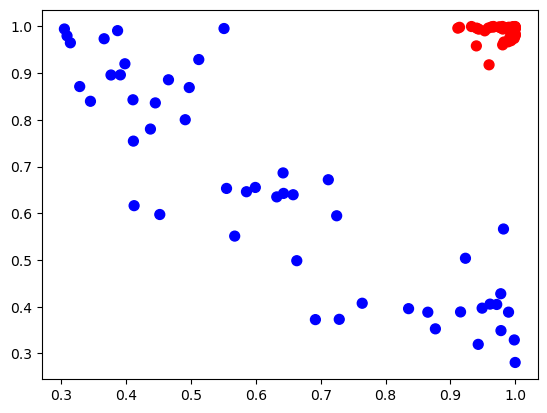

In [29]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')
